#**Linear Regression**

**AIm:** To implement simple linear regression

Simple linear regression is used to find out the best relationship between a single input variable (independent variable) & output variable (dependent variable) provided that both variables are continuous in nature. This relationship represents how an input variable is related to the output variable and how it is represented by a straight line.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
x=np.random.randint(1,101,size=20)
y=3*x+5

In [41]:
print("Input variable is: ")
print(x)
print("Target variable is: ")
print(y)

Input variable is: 
[42 47 43 76 79 63 41 49 31 33 62 74 86 87 89 38 78 86  3 19]
Target variable is: 
[131 146 134 233 242 194 128 152  98 104 191 227 263 266 272 119 239 263
  14  62]


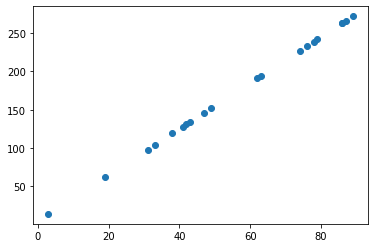

In [42]:
plt.scatter(x,y)
plt.show()
# plt.plot(x,y,'o')
# plt.show()



#**`Simple Linear Regression with 2 variables`**


---







>$a_1 = \frac{\bar{ xy} - \bar{x}\bar{y} }{\bar{x^2} - \bar{x}^2} $

>$ a_0 = \bar{y} - a_1\bar{x} $

In [43]:
def linearReg(x,y):
  xy=x*y
  sq_x=x*x
  mean_x=np.mean(x)
  mean_y=np.mean(y)
  mean_xy=np.mean(xy)
  sq_x1=np.mean(sq_x)
  a1=(mean_xy-mean_y*mean_x)/(sq_x1-mean_x*mean_x)
  a0=mean_y-(a1*mean_x)
  return [a0,a1]

In [44]:
print("The values of a0,a1 are: ")
print(linearReg(x,y))

The values of a0,a1 are: 
[5.000000000000085, 2.9999999999999987]


#**`Simple Linear Regression with more variables`**

###**Using Gradient Descent**

>$E = (y - ̄y ) $

>$MSE = \frac{1}{m} ∑E^2  $

>$\frac{δE}{δa_0} = \frac{-2}{m} ∑E $

>$a_{0} = a_{0} +\alpha . \frac{2}{m}\sum_{i=1}^{m}(y-y')$

>$\frac{δE}{δa_1} = \frac{-2}{m} ∑Ex $

>$a_{1} = a_{1} +\alpha . \frac{2}{m}\sum_{i=1}^{m}(y-y').x'$


In [45]:
x=np.random.randint(1,101,size=200)
y=3*np.power(x,1)+5

In [46]:
class LinearRegression:
  def __init__(self, e ,lr):
    self.a0=np.random.random()
    self.a1=np.random.random()
    self.lr = lr
    self.e = e
    self.mx=[]
    self.my=[]
    self.ms=[]
    self.y1=[]
    self.itr={}

  def mse(self,x,y,y1):
    m=len(x)
    return (1/m)*np.sum(np.power(y-y1,2))

  def fit(self, x, y):
    l=self.lr
    m=len(x)

    for i in range(self.e):
      y1=(self.a0)+(self.a1)*x
      # print(mse(x,y,y1))
      if(i%10000==0 and i<self.e):
        self.itr[i]=self.mse(x,y,y1)
      self.y1.append(y1)
      self.ms.append(self.mse(x,y,y1))
      self.mx.append(self.a1)
      self.my.append(self.a0)
      d1=(-2/m)*np.sum(y-y1)
      d2=(-2/m)*np.sum((y-y1)*x)
      self.a0=(self.a0)-l*d1
      self.a1=(self.a1)-l*d2

    return [self.a0,self.a1]
 
  def predict(self, x):
    return self.a1 * x + self.a0
  
  def plotU(self,x,y):
    # print(self.a0," : ",self.a1)
    cf=[]
    p=np.arange(0,6,0.1)
    # print(p)
    for s in p:
      y2=x*s+self.a0
      cf.append(self.mse(x,y,y2))
    # print(s)
    # print(cf)
    plt.scatter(p,cf)
    plt.plot(self.mx,self.ms,'-r')
    plt.show()
  
  def errorPlot(self):
    data=self.itr
    itr=list(data.keys())
    error=list(data.values())
    plt.plot(itr,error)
    plt.xticks(np.arange(0,self.e,10000))
    plt.title("Iterations vs Errors")
    plt.xlabel('No of Iterations')
    plt.ylabel('Error')


In [47]:
o=LinearRegression(100000,0.0002)
[a0,a1]= o.fit(x,y)
print(a0,a1)

4.999661446200591 3.0000050895344668


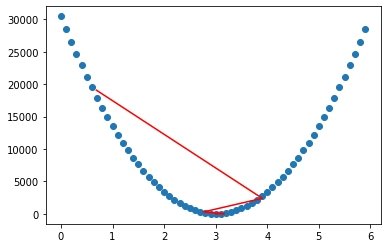

In [48]:
o.plotU(x,y)

In [49]:
print(o.predict(2))

10.999671625269524


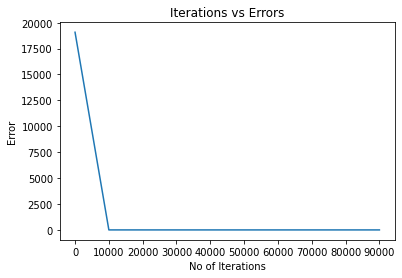

In [50]:
o.errorPlot()

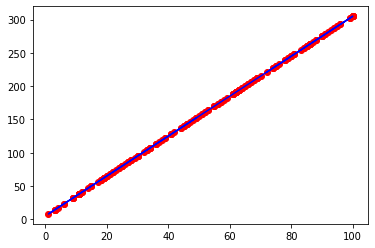

In [51]:
y1=a0+a1*x
plt.scatter(x,y,c="red")
plt.plot(x,y1,c="blue")
plt.show()

##**`3D-Plot`**

In [52]:
def mse(x,y,y1):
  m=len(x)
  return (1/m)*np.sum(np.power(y-y1,2))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9]
5.9
[30477.83840460157, 28479.85010778534, 26549.59011096911, 24687.05841415288, 22892.255017336644, 21165.17992052041, 19505.833123704182, 17914.214626887948, 16390.32443007172, 14934.162533255487, 13545.728936439253, 12225.02363962302, 10972.046642806788, 9786.79794599056, 8669.277549174325, 7619.485452358094, 6637.421655541863, 5723.086158725631, 4876.4789619094, 4097.600065093166, 3386.4494682769355, 2743.0271714607043, 2167.333174644472, 1659.3674778282402, 1219.130081012008, 846.620984195777, 541.8401873795457, 304.7876905633136, 135.46349374708188, 33.86759693085016, 1.1461867508865873e-07, 33.86070329838699, 135.44970648215542, 304.7670096659239, 541.8126128496929, 846.5865160334604, 1219.0887192172286, 1659.3192224009972, 2167.278025584

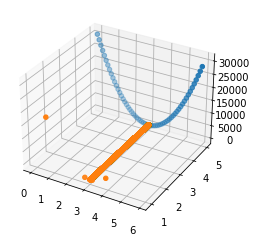

In [53]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cf=[]
p=np.arange(0,6,0.1)
print(p)
for s in p:
  y2=x*s+o.a0
  cf.append(mse(x,y,y2))
print(s)
print(cf)
# plt.scatter(p,cf)
ax.scatter(p,np.full(len(p),o.a0),cf,marker='o')
ax.scatter(o.mx,o.my,o.ms,marker='o')
# print(o.mx)
 
plt.show()

#**Other Stuff**

In [54]:
def gradDesc(x,y):
  a0=np.random.random()
  a1=np.random.random()
  l=0.0001
  e=100000
  m=len(x)

  for i in range(e):
    y1=a0+a1*x
    d1=(-2/m)*np.sum(y-y1)
    d2=(-2/m)*np.sum((y-y1)*x)
    a0=a0-l*d1
    a1=a1-l*d2

  return [a0,a1]

In [55]:
def mse(x,y,y1):
  m=len(x)
  return (1/m)*np.sum(np.power(y-y1,2))

[4.956057851061037, 3.0006605894896]


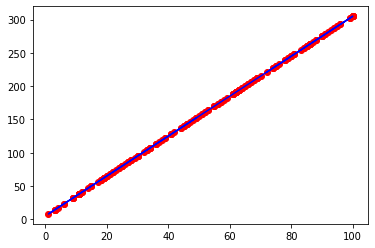

In [56]:
p=gradDesc(x,y)
print(p)
y1=p[0]+p[1]*x
plt.scatter(x,y,c="red")
plt.plot(x,y1,c="blue")

plt.show()


In [57]:
def gd(x,y):
  l=0.0001
  m=len(x)
  a0=0
  a1=0

  y1=a0+a1*x
  print(mse(x,y,y1))
  for i in range(1000000):
    # print(a0,a1)
    d1=(2/m)*np.sum((y-y1))
    d2=(2/m)*np.sum((y-y1)*x)
    a0=a0+l*d1
    a1=a1+l*d2
    y1=a0+a1*x
    # print(d1,d2)
  print(mse(x,y,y1))
  print([a0,a1])

In [58]:
gd(x,y)

32029.885000000002
2.1228505784760432e-23
[4.999999999990494, 3.000000000000143]


In [59]:
x=np.random.randint(1,101,size=20)
y=3*np.power(x,1.5)+5
print(x)
print(y)

[ 37  60  87  59  21  57  22 100  13  84  32  71  96  74  85   5  73  29
  81  64]
[ 680.18664086 1399.27400463 2439.44593286 1364.56279737  293.70226878
 1296.02168843  314.56744015 3005.          145.61649974 2314.61815026
  548.05800795 1799.76990169 2826.81218369 1914.71620928 2355.98383661
   38.54101966 1876.13682022  473.50933822 2192.         1541.        ]


In [60]:
def mse(x,y,y1):
  m=len(x)
  return (1/m)*np.sum(np.power(y-y1,2))

def gd(x,y):
  l=0.0001
  m=len(x)
  a0=0
  a1=0
  # a0=np.random.random()
  # a1=np.random.random()
  y1=a0+a1*np.power(x,1.5)
  print(mse(x,y,y1))
  for i in range(1000000):
    # print(a0,a1)
    d1=(2/m)*np.sum((y-y1))
    d2=(2/m)*np.sum((y-y1)*x)
    a0=a0+l*d1
    a1=a1+l*d2
    y1=a0+a1*np.power(x,1.5)
    # print(d1,d2)
  print(mse(x,y,y1))
  print([a0,a1])

In [61]:
gd(x,y) # not working

2908972.8613702073


<ipython-input-60-1738ba97ba8d>:19: RuntimeWarning: invalid value encountered in double_scalars
  a1=a1+l*d2


nan
[nan, nan]
